
Exploration of normalized movie lines, conversations, and messages data before preprocessing

In [ ]:
# References:
# https://github.com/douglasdcm/chatbot_for_movies/blob/master/notebooks/001.0%20-%20data_exploration_movie_lines_msg.ipynb
# Data Analysis based on this article - https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools?utm_source=medium&utm_medium=crosspost&utm_campaign=blog-exploratory-data-analysis-natural-language-processing-tools

In [ ]:
import pandas as pd
import re
#import gensim
import numpy as np
#from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial import distance

In [ ]:
#setting parameters for data visualization
np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 2) # Changed 'precision' to 'display.precision'

In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')

messages = pd.read_csv('/content/drive/MyDrive/movie-corpus/movie_lines_normalized.tsv', header = None, delimiter="\t", quoting=3, encoding='ISO-8859-2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
messages.columns = ['msg_line', 'user_id', 'movie_id', 'msg']

In [ ]:
messages.head(10)

,msg_line,user_id,movie_id,msg
0,L1045,u0,m0,They do not!
1,L1044,u2,m0,They do to!
2,L985,u0,m0,I hope so.
3,L984,u2,m0,She okay?
4,L925,u0,m0,Let's go.
5,L924,u2,m0,Wow
6,L872,u0,m0,Okay -- you're gonna need to learn how to lie.
7,L871,u2,m0,No
8,L870,u0,m0,"""""""I'm kidding. You know how sometimes you jus..."
9,L869,u0,m0,Like my fear of wearing pastels?


Data Exlporation

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304713 entries, 0 to 304712
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msg_line  304713 non-null  object
 1   user_id   304713 non-null  object
 2   movie_id  304713 non-null  object
 3   msg       304713 non-null  object
dtypes: object(4)
memory usage: 9.3+ MB


In [ ]:
messages.describe()

,msg_line,user_id,movie_id,msg
count,304713,304713,304713,304713
unique,304713,9035,659,265277
top,L1045,u4525,m289,What?
freq,1,537,1530,1679


In [ ]:
data = messages['msg']

<Axes: >

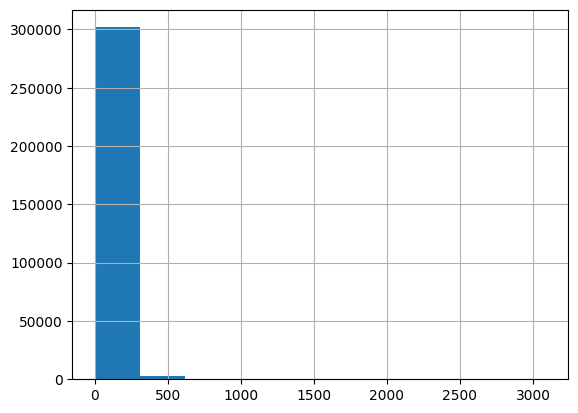

In [ ]:
# Number of characters of each message
#histogram to display the number of character of each message
data.str.len().hist()

In [ ]:
#checking the average word length
data_set = [type(item) for item in data]
data_set = set(data_set)
data_set

{str}

In [ ]:
float_val = [it for it in data if isinstance(it, float)]
print(len(float_val))
float_val = set(float_val)
print(float_val)

0
set()


In [ ]:
messages[messages['msg'].isna()]

,msg_line,user_id,movie_id,msg


In [ ]:
#Removing non-alphabetical messages (not used)

<Axes: >

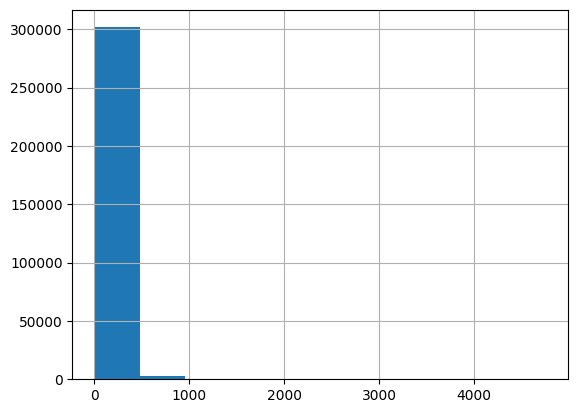

In [ ]:
#number of words for each message
data.str.split(' ').\
    map(lambda x: len(str(x))).\
    hist()

<Axes: >

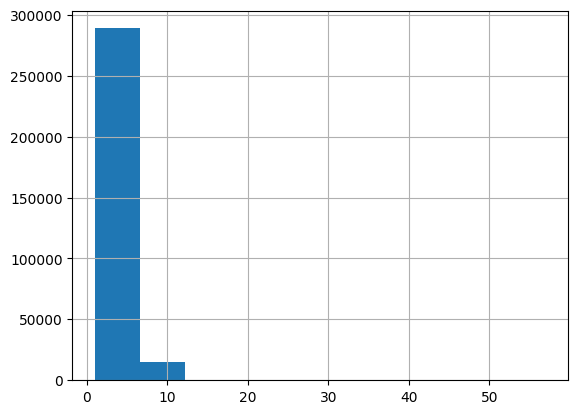

In [ ]:
#checking the average word length
data.str.split(' ').\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [ ]:
# prompt: Number of words for each message and Average word length

import pandas as pd
import numpy as np

# Assuming 'messages' DataFrame is already loaded as in the provided code
# ... (previous code to load the dataframe)

# Number of words for each message
messages['word_count'] = messages['msg'].str.split().str.len()

# Average word length for each message
def avg_word_length(text):
    words = text.split()
    if not words:
        return 0  # Handle empty strings
    return np.mean([len(word) for word in words])

messages['avg_word_length'] = messages['msg'].apply(avg_word_length)

# Display or further process the results
print(messages[['msg', 'word_count', 'avg_word_length']].head())

            msg  word_count  avg_word_length
0  They do not!           3             3.33
1   They do to!           3             3.00
2    I hope so.           3             2.67
3     She okay?           2             4.00
4     Let's go.           2             4.00


In [ ]:
# Distribuition of stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#checkig the distribuition of stopwrds in the mesages
stop=set(stopwords.words('english'))
corpus=[]
msg_ = data.str.split()
msg_ = msg_.values.tolist()
corpus=[word for i in msg_ for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [ ]:
len(list(dic.values()))

164

In [ ]:
import matplotlib.pyplot as plt

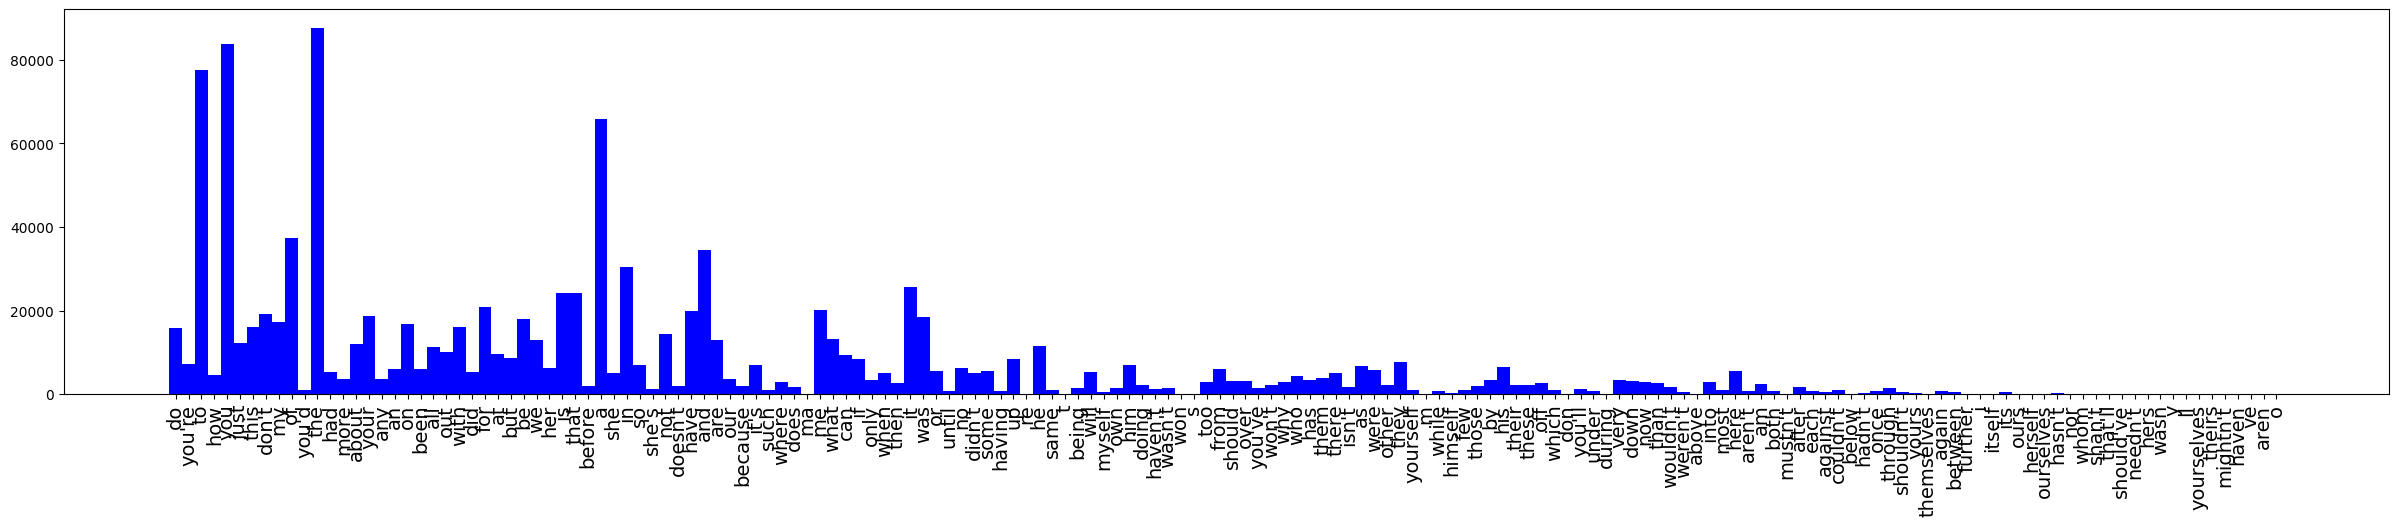

In [ ]:
x = dic.keys()
y = dic.values()
plt.subplots(figsize=(30,5))
plt.bar(x, y, 1, color='b')
plt.xticks(list(x), rotation=90, fontsize=14)
plt.show()

In [ ]:

# From the provided code, the stop words and their frequencies are already calculated and stored in the 'dic' dictionary.
# The code then plots a bar chart to visualize the distribution of stop words.

# To identify the most used stop words, you can sort the dictionary 'dic' by its values (frequencies) in descending order.

from collections import OrderedDict

sorted_dic = OrderedDict(sorted(dic.items(), key=lambda item: item[1], reverse=True))

# Print the top N most frequent stop words (e.g., top 10)
N = 10
most_used_stopwords = list(sorted_dic.keys())[:N]
print(f"The {N} most used stop words are: {most_used_stopwords}")

# You can also access the frequency of each of these stopwords from the sorted_dic
for word in most_used_stopwords:
    print(f"Stop word '{word}' appears {sorted_dic[word]} times")

The 10 most used stop words are: ['the', 'you', 'to', 'a', 'of', 'and', 'in', 'it', 'that', 'is']
Stop word 'the' appears 87712 times
Stop word 'you' appears 83758 times
Stop word 'to' appears 77594 times
Stop word 'a' appears 65952 times
Stop word 'of' appears 37360 times
Stop word 'and' appears 34587 times
Stop word 'in' appears 30542 times
Stop word 'it' appears 25722 times
Stop word 'that' appears 24344 times
Stop word 'is' appears 24306 times


In [ ]:
from collections import Counter
import seaborn as sns

<ipython-input-29-0122ca481414>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y,y=x, palette=colors) # Pass the color palette to the barplot


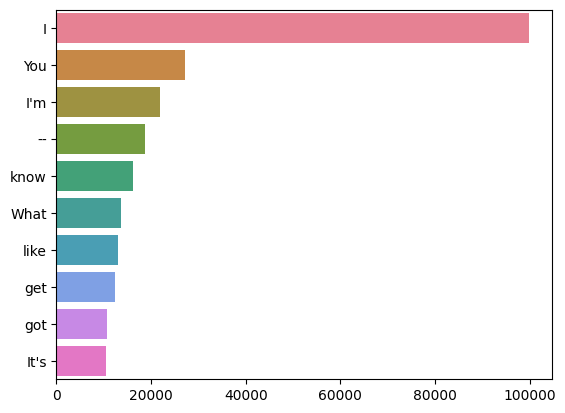

In [ ]:
#ploting the occurences of each word
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

# Use a color palette for the bars
colors = sns.color_palette("husl", len(x)) # Choose a suitable color palette

sns.barplot(x=y,y=x, palette=colors) # Pass the color palette to the barplot
plt.show()

In [ ]:
from nltk.util import ngrams

In [ ]:
#get the most frequent n-grams
from sklearn.feature_extraction.text import CountVectorizer # Importing CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [ ]:
def plot_n_gram(corpus, n=2):
    top_n_bigrams=get_top_ngram(corpus,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

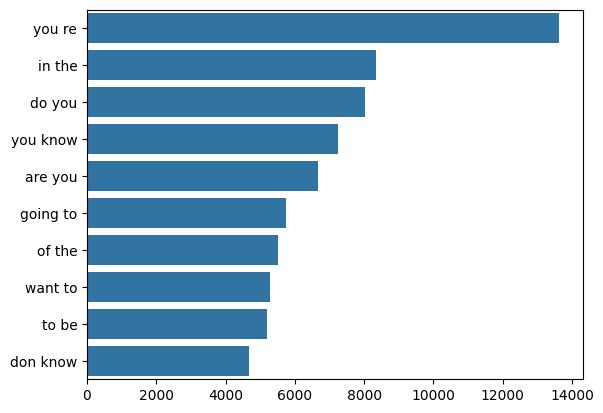

In [ ]:
plot_n_gram(data, 2)

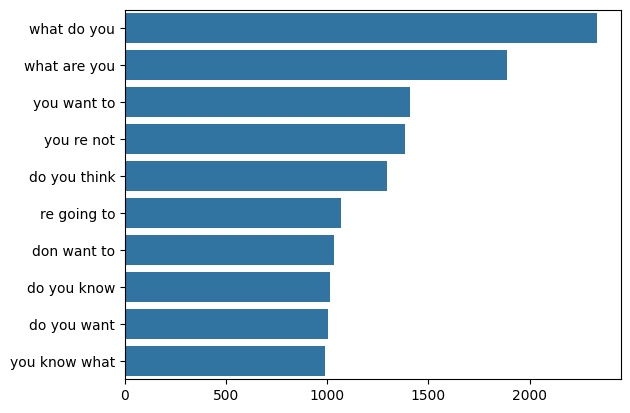

In [ ]:
plot_n_gram(data, 3)

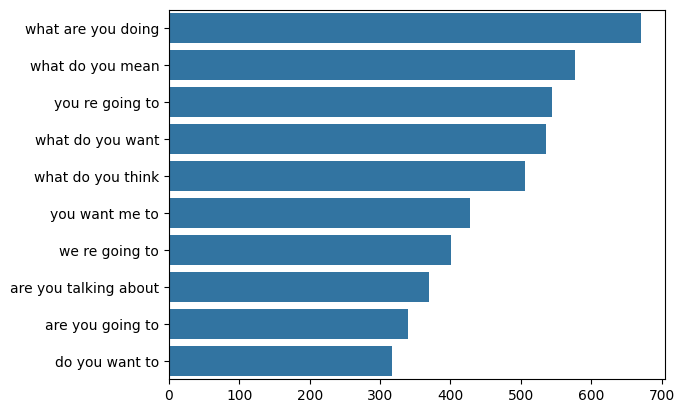

In [ ]:
plot_n_gram(data, 4)

In [ ]:
# Sentiment Analysis

            msg  sentiment_polarity
0  They do not!                 0.0
1   They do to!                 0.0
2    I hope so.                 0.0
3     She okay?                 0.5
4     Let's go.                 0.0


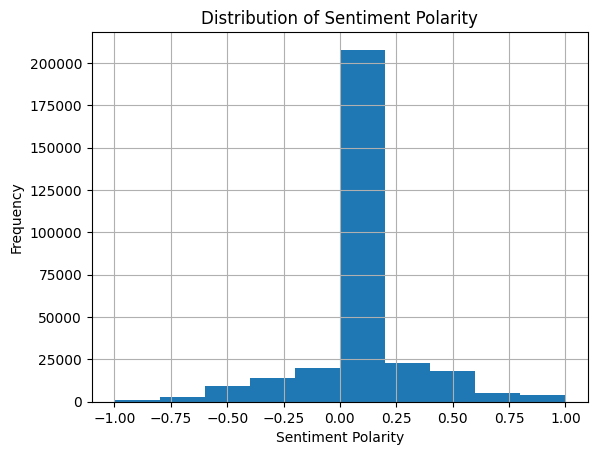

In [ ]:
# Prompt: Sentimental analysis

# Install necessary libraries
!pip install textblob

from textblob import TextBlob


# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to the 'msg' column
messages['sentiment_polarity'] = messages['msg'].apply(get_sentiment)

# Display messages with their sentiment scores
print(messages[['msg', 'sentiment_polarity']].head())

# Analyze the distribution of sentiment scores
messages['sentiment_polarity'].hist()
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity')
plt.show()

In [ ]:
#Named entity recognition

In [ ]:

#Parts of Speach Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
def remove_duplicated_spaces(corpus):
    #remove duplicated spaces

    return re.sub(r' +', ' ', corpus)

In [ ]:
msg_no_space = [remove_duplicated_spaces(str(m)) for m in data]
msg_no_space = pd.Series(msg_no_space)

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
import re
import pandas as pd
from collections import Counter


def remove_duplicated_spaces(corpus):
    #remove duplicated spaces
    return re.sub(r' +', ' ', corpus)


def pos(text):
    #matched = re.match(r" +", text)
    if text != ' ':
        #print(text)
        # Tokenize using word_tokenize after downloading 'punkt'
        pos = nltk.pos_tag(word_tokenize(text))
        #print(pos)
        pos = list(map(list, zip(*pos)))[1]
        return pos
    return

# msg_no_space = [remove_duplicated_spaces(str(m)) for m in data]
# msg_no_space = pd.Series(msg_no_space)
# ... (Rest of your data loading if necessary) ...

# Example usage assuming msg_no_space is defined
tags = msg_no_space[0:5000].apply(lambda x: pos(x))
#tags = [pos(m) for m in msg_no_space[0:10000]]
#tags
tags = [x for l in tags for x in l]
counter = Counter(tags)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<Axes: >

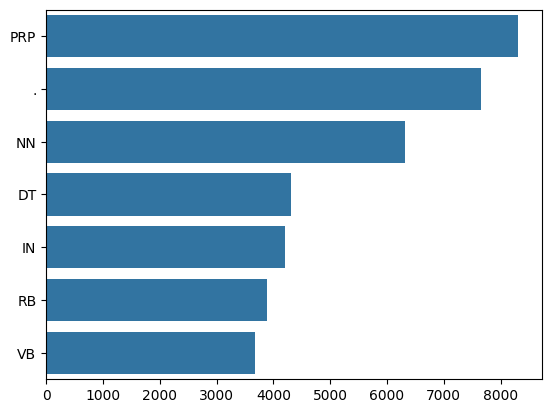

In [ ]:
x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

In [ ]:
### most commonly nouns
def get_adjs(text, _tag='PRP'):
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag == _tag:
            [].append(word)
    return []

In [ ]:
%%time
words = msg_no_space.apply(lambda x: get_adjs(x)) # Changed msg to msg_no_space
words = [x for l in words for x in l]
counter = Counter(words)

CPU times: user 4min 40s, sys: 5.28 s, total: 4min 45s
Wall time: 5min 12s


In [ ]:
# Text complexity

In [ ]:
!pip install textstat # Installs the textstat library which contains the flesch_reading_ease function.

In [ ]:
from textstat import flesch_reading_ease

In [ ]:
msg = messages['msg']

CPU times: user 16.1 s, sys: 78.8 ms, total: 16.2 s
Wall time: 17 s


<Axes: >

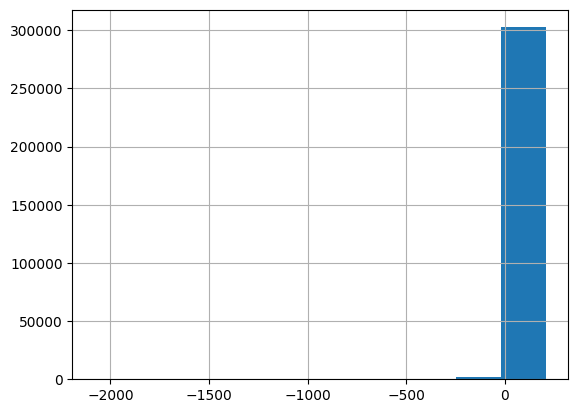

In [ ]:
%%time
reading = msg.\
   apply(lambda x : flesch_reading_ease(x))
reading.hist()

In [ ]:
x=[i for i in range(len(reading)) if reading[i]<0]

messages.iloc[x]['msg'].head()

,msg
97,Hopefully.
99,Expensive?
203,Extremely unfortunate maneuver.
258,Thirty-two.
371,Neither has his heterosexuality.
